In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

2022-12-03 00:34:54.798164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [3]:
#this function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):

  return list(set(df.columns) - set(return_categorical(df)))


def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)

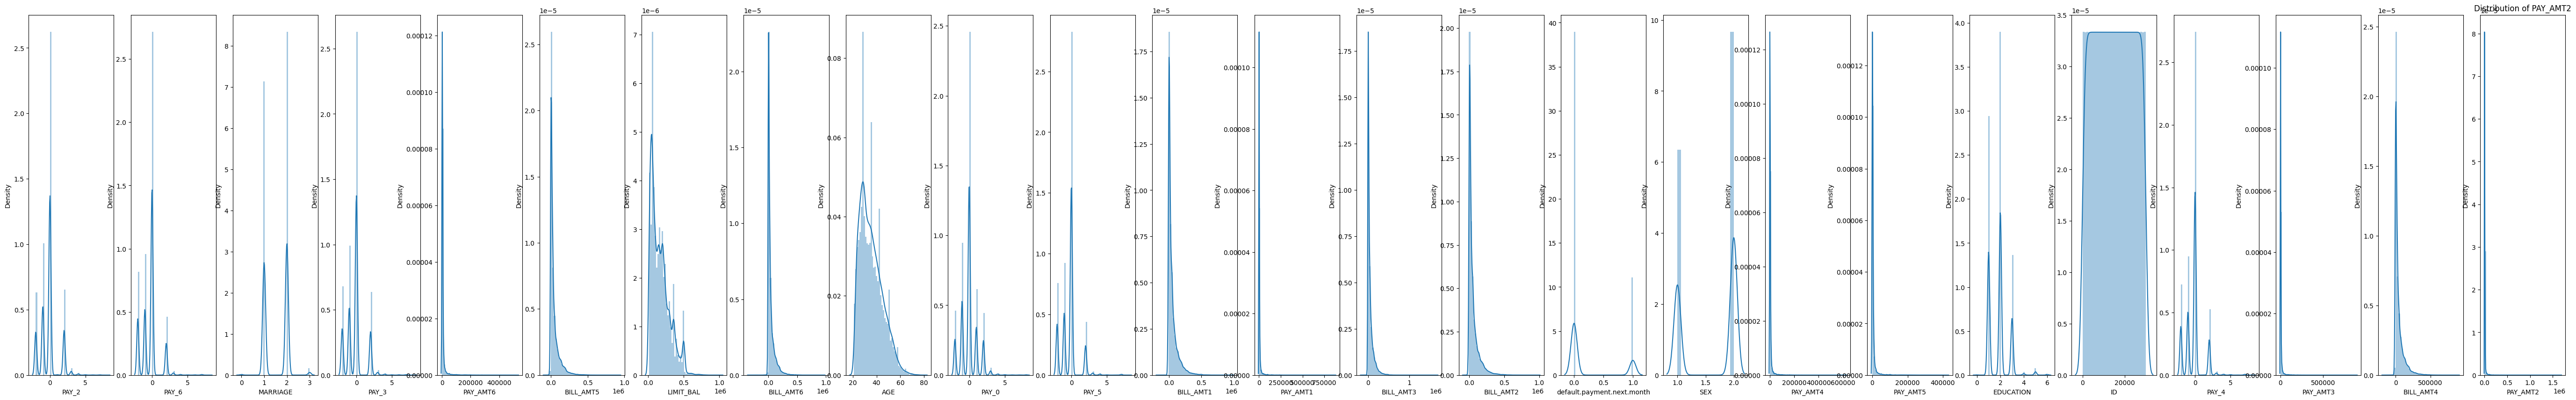

In [4]:
check_normal(df)

In [25]:
# plotting graphs for all categorical columns
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [26]:
corr = df.corr()
corr_greater_than_75 = corr[corr>=.0]
corr_greater_than_75

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,NaN,0.018678,NaN,NaN,NaN,NaN,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,NaN
LIMIT_BAL,0.026179,1.000000,0.024755,NaN,NaN,0.144713,NaN,NaN,NaN,NaN,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,NaN
SEX,0.018497,0.024755,1.000000,0.014232,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,0.039177,NaN,0.014232,1.000000,NaN,0.175061,0.105364,0.121566,0.114025,0.108793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028006
MARRIAGE,NaN,NaN,NaN,NaN,1.000000,NaN,0.019917,0.024199,0.032688,0.033122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,0.018678,0.144713,NaN,0.175061,NaN,1.000000,NaN,NaN,NaN,NaN,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,NaN,NaN,NaN,0.105364,0.019917,NaN,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,NaN,NaN,NaN,NaN,NaN,NaN,0.324794
PAY_2,NaN,NaN,NaN,0.121566,0.024199,NaN,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,NaN,NaN,NaN,NaN,NaN,NaN,0.263551
PAY_3,NaN,NaN,NaN,0.114025,0.032688,NaN,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,NaN,NaN,NaN,NaN,NaN,0.235253
PAY_4,NaN,NaN,NaN,0.108793,0.033122,NaN,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,NaN,NaN,NaN,NaN,NaN,NaN,0.216614


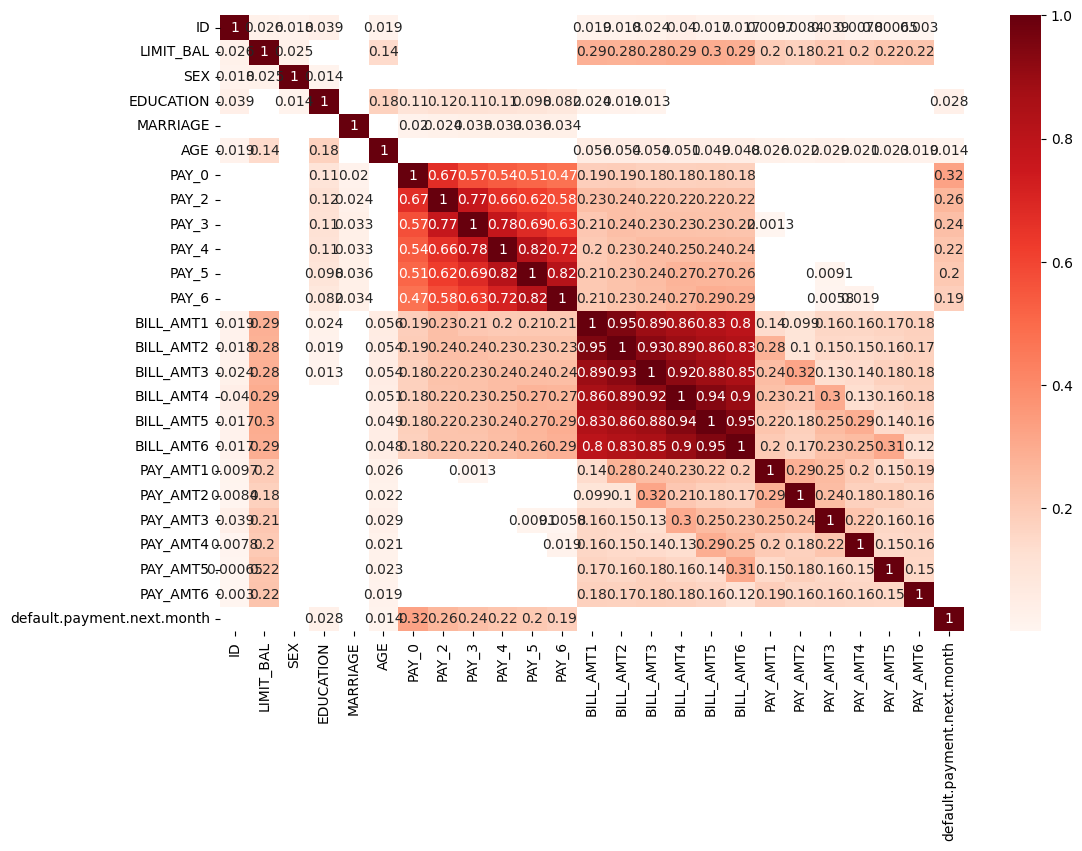

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

In [8]:
df  = pd.get_dummies(df, drop_first = True)

In [10]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
x = df.drop("default.payment.next.month", axis=1)
y = df['default.payment.next.month']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)

In [12]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 22500
Resampled dataset shape 34982


In [13]:
s = StandardScaler()

In [14]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit( s.fit_transform(x_train), y_train)

classifier(knn, s.fit_transform(x_smote),s.transform(x_test), y_smote,y_test)

Train accuracy is: 0.5921330970213252
Test accuracy is: 0.8068

Train ROC is: 0.5921330970213252
Test ROC is: 0.6069139021394355

F score is: 0.3630769230769231
Precision is: 0.6373456790123457
Recall is: 0.2538414259373079


In [15]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( s.fit_transform(x_train), y_train)
    pred_i = knn.predict(s.transform(x_test))
    error_rate.append(np.mean(pred_i != y_test))

acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(s.fit_transform(x_train), y_train)
    yhat = neigh.predict(s.transform(x_test))
    acc.append(metrics.accuracy_score(y_test, yhat))

Minimum error:- 0.18973333333333334 at K = 37


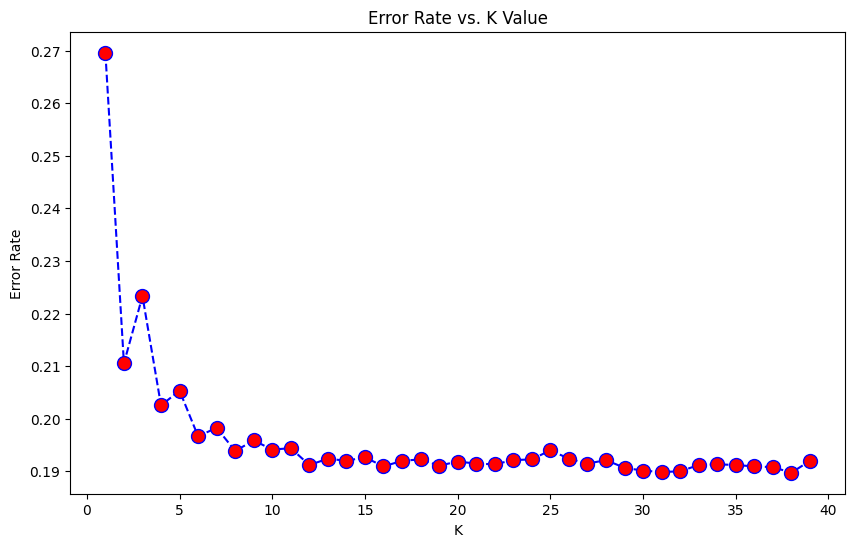

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [17]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit( s.fit_transform(x_smote), y_smote)

classifier(knn, s.fit_transform(x_smote),s.transform(x_test),y_smote,y_test)

Train accuracy is: 0.7689097250014293
Test accuracy is: 0.7181333333333333

Train ROC is: 0.7689097250014293
Test ROC is: 0.6647209197842763

F score is: 0.46750629722921916
Precision is: 0.3960734101579172
Recall is: 0.5703749231714813


In [18]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
classifier(dtree, x_train,x_test,y_train,y_test)


Train accuracy is: 1.0
Test accuracy is: 0.7268

Train ROC is: 1.0
Test ROC is: 0.6131547901175161

F score is: 0.39575346505455616
Precision is: 0.38038548752834467
Recall is: 0.4124154886293792


In [19]:
param_grid = {'max_depth':np.arange(3,20),
              'min_samples_split': np.arange(3,20,1),
             'min_samples_leaf':np.arange(3,30),
              'min_samples_split' : np.arange(3,30),
              'criterion': ('gini', 'entropy')}



random_search(DecisionTreeClassifier(random_state=0),param_grid, x_train,x_test,y_train,y_test)

Best parameters are:  {'min_samples_split': 7, 'min_samples_leaf': 15, 'max_depth': 5, 'criterion': 'gini'}

Best estimator is:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=7,
                       random_state=0)

Scores and accuracies are:

Train accuracy is: 0.8253777777777778
Test accuracy is: 0.8192

Train ROC is: 0.6682125453013688
Test ROC is: 0.653046229183566

F score is: 0.46318289786223277
Precision is: 0.6507230255839822
Recall is: 0.35955746773202213


In [23]:



kfold = model_selection.KFold(n_splits = 3)

# bagging classifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=15, max_depth=5, criterion='gini'),n_estimators = 500,)

classifier(model.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.8253777777777778
Test accuracy is: 0.8209333333333333

Train ROC is: 0.6619439362814535
Test ROC is: 0.6494872360267331

F score is: 0.45649534601375963
Precision is: 0.6682464454976303
Recall is: 0.3466502765826675


In [21]:
rforest = RandomForestClassifier(random_state=0)
classifier(rforest.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9999555555555556
Test accuracy is: 0.8172

Train ROC is: 0.9999001796765822
Test ROC is: 0.6499917690270738

F score is: 0.45702970297029705
Precision is: 0.6425389755011136
Recall is: 0.35464044253226795


In [22]:
params = {'n_estimators' : np.arange(100,1000, 100),
              'max_depth' : np.arange(3,20,1),
              'min_samples_split' : np.arange(3,20,1),
              'min_samples_leaf' : np.arange(3,20,1),
         'max_features': ('sqrt', 'log2'), 'criterion': ('gini', 'entropy')}

random_search(RandomForestClassifier(random_state=0),params, x_train,x_test,y_train,y_test)

Best parameters are:  {'n_estimators': 700, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 18, 'criterion': 'entropy'}

Best estimator is:  RandomForestClassifier(criterion='entropy', max_depth=18, max_features='log2',
                       min_samples_leaf=10, min_samples_split=11,
                       n_estimators=700, random_state=0)

Scores and accuracies are:

Train accuracy is: 0.8532
Test accuracy is: 0.8194666666666667

Train ROC is: 0.7078338916769322
Test ROC is: 0.6525499637847656

F score is: 0.4622716441620333
Precision is: 0.6531986531986532
Recall is: 0.35771358328211433


In [24]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(s.fit_transform(x_smote), y_smote,validation_split=0.33, batch_size = 10, epochs = 100)

2022-12-03 01:03:33.550609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
2344/2344 [==============================] - 6s 2ms/step - loss: 0.5487 - accuracy: 0.7594 - val_loss: 1.0600 - val_accuracy: 0.2584
Epoch 2/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.5057 - accuracy: 0.7844 - val_loss: 1.0775 - val_accuracy: 0.2740
Epoch 3/100
2344/2344 [==============================] - 6s 2ms/step - loss: 0.4949 - accuracy: 0.7884 - val_loss: 1.0991 - val_accuracy: 0.2677
Epoch 4/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4890 - accuracy: 0.7899 - val_loss: 1.0691 - val_accuracy: 0.2955
Epoch 5/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4850 - accuracy: 0.7916 - val_loss: 1.0776 - val_accuracy: 0.2883
Epoch 6/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4820 - accuracy: 0.7928 - val_loss: 1.1507 - val_accuracy: 0.2566
Epoch 7/100
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4799 - accuracy: 0.7938 - val_loss: 1.0842 - val_ac